In [145]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
from ngrams import corpus_from_file, Ngram

### Crear y fitear modelo

In [147]:
ngram = Ngram(5)
corpus = corpus_from_file("corpus.txt")
ngram.fit(corpus)

### Generar texto

In [155]:
ngram.generate(temperature=0.3)

"jerry: i don't know what to do. i mean what if i take my clothes off and she still has hers' on? then i really look like an idiot."

### _TODO_: Evaluación del modelo 

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(corpus, test_size=0.2, random_state=42, shuffle=True)
ngram.fit(train)

print(ngram.perplexity(test))

1.614710495147288e-09


In [8]:
test[11]

"KRAMER: Oh, yeah yeah, I have to. I'm your fiancé, Peter Von Nostrand.\n"

In [9]:
from matplotlib import pyplot as plt

## Experimentación

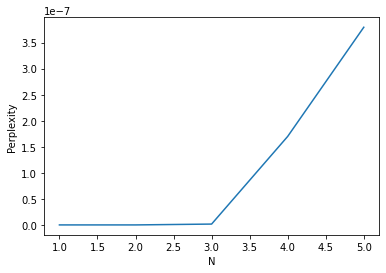

In [45]:
# ¿Como es la calidad de los textos generados, a medida que aumentan n y/o la cantidad de datos de entrenamiento? ¿Que tipos de errores seproducen?

ppls = []
for i in range(1, 6):
    ngram = Ngram(i)
    ngram.fit(train)
    ppls.append(ngram.perplexity(test))

fig, ax = plt.subplots()
ax.plot(range(1, 6), ppls)
ax.set_xlabel("N")
ax.set_ylabel("Perplexity")
plt.show()

## Generación